# 哈哈！让我玩一玩大数据！

In [1]:
import pandas as pd

# 1. 加载 Excel 文件
excel_path = 'metadata.xlsx'  # 替换为您的 Excel 文件路径
metadata = pd.read_excel(excel_path)
metadata.head().columns


Index(['ID', '标题', '发布时间'], dtype='object')

In [2]:
# 2. 查看基本信息
print("数据集基本信息：")
print("-" * 50)
print(f"文章总数：{len(metadata)}")
print("\n数据集列信息：")
print(metadata.info())

数据集基本信息：
--------------------------------------------------
文章总数：2503

数据集列信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      2503 non-null   int64         
 1   标题      2503 non-null   object        
 2   发布时间    2503 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 58.8+ KB
None


In [3]:
import os

# 3. 分析文章内容
def read_article(file_id):
    try:
        with open(f'smsarticles/{file_id}.txt', 'r', encoding='utf-8') as f:
            return f.read()
    except:
        return None


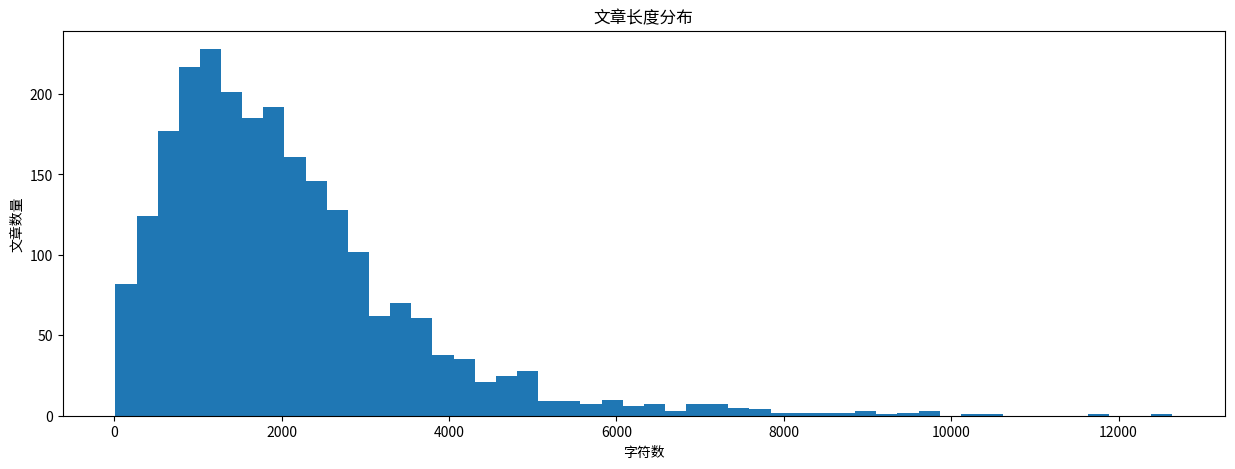


文章长度统计：
--------------------------------------------------
平均长度：2057.26 字符
最短文章：15 字符
最长文章：12641 字符


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import zhplot

# plt.style.use('seaborn')
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 4. 可视化分析
plt.figure(figsize=(15, 5))

# 统计所有文章的字符长度
all_lengths = []
for idx in metadata.index:
    text = read_article(idx)
    if text:
        all_lengths.append(len(text))

plt.hist(all_lengths, bins=50)
plt.title('文章长度分布')
plt.xlabel('字符数')
plt.ylabel('文章数量')
plt.show()

# 显示基本统计量
print("\n文章长度统计：")
print("-" * 50)
print(f"平均长度：{sum(all_lengths)/len(all_lengths):.2f} 字符")
print(f"最短文章：{min(all_lengths)} 字符")
print(f"最长文章：{max(all_lengths)} 字符")

In [5]:
import numpy as np

# 计算文章长度的分位数
length_percentiles = np.percentile(all_lengths, [0, 5, 10, 25, 50, 75, 90, 95, 100])
print("\n文章长度分位数分布：")
print("-" * 50)
for i, p in enumerate([0, 5, 10, 25, 50, 75, 90, 95, 100]):
    print(f"{p}分位数: {length_percentiles[i]:.0f} 字符")


文章长度分位数分布：
--------------------------------------------------
0分位数: 15 字符
5分位数: 378 字符
10分位数: 578 字符
25分位数: 1022 字符
50分位数: 1746 字符
75分位数: 2689 字符
90分位数: 3834 字符
95分位数: 4845 字符
100分位数: 12641 字符


In [ ]:
# 设定阈值为10%分位数
min_length_threshold =  100
# 创建一个新的DataFrame来存储文章长度信息
article_lengths = pd.DataFrame({
    'article_id': list(range(len(all_lengths))),
    'length': all_lengths
})

# 找出过短的文章
short_articles = article_lengths[article_lengths['length'] < min_length_threshold]
print(f"\n过短文章统计 (少于 {min_length_threshold:.0f} 字符)：")
print("-" * 50)
print(f"过短文章数量：{len(short_articles)}")
print(f"占总文章比例：{(len(short_articles) / len(article_lengths) * 100):.2f}%")

print("\n前10篇过短文章示例：")
for idx in short_articles['article_id'].head(10):
    text = read_article(idx)
    if text is not None:
        print(f"\n文章ID {idx}（{len(text)} 字符）:")
        print(text[:100] + "..." if len(text) > 100 else text)
    else:
        print(f"\n文章ID {idx}：内容不存在或无法读取。")


过短文章统计 (少于 0 字符)：
--------------------------------------------------
过短文章数量：0
占总文章比例：0.00%

前10篇过短文章示例：


In [7]:
def remove_articles(article_ids, metadata_df):
    """删除指定编号的文章并更新数据集"""
    for aid in article_ids:
        if os.path.exists(f'smsarticles/{aid}.txt'):
            os.remove(f'smsarticles/{aid}.txt')
    metadata_df = metadata_df[~metadata_df.index.isin(article_ids)].reset_index(drop=True)
    metadata_df.to_excel('metadata.xlsx', index=False)
    return metadata_df

In [8]:
remove_articles([0,26],metadata)

,ID,标题,发布时间
0,4,深圳中学学科竞赛和北大清华等名校拟录取情况通报,2014-03-25 17:07:37
1,5,第二届卓越成长交流营暨家长论坛活动第二场,2014-03-28 15:55:21
2,6,2014届深圳中学海外大学录取结果喜报,2014-04-04 16:11:45
3,7,加拿大计算机竞赛喜报,2014-04-08 16:49:48
4,8,20132014学年共享教育智慧系列活动之二为了每一位学生的充分发展,2014-04-18 15:55:39
...,...,...,...
2496,2504,深中学子梁宇恒当我们谈论深中的时候我们会谈论些什么,2025-07-02 12:51:27
2497,2505,深中荣耀丘成桐大学生数学竞赛捷报频传,2025-07-03 12:49:48
2498,2506,AI赋能创意劳动让生活更美,2025-07-04 18:35:26
2499,2507,深中学子吴宇鹏凤凰木下的成长,2025-07-06 11:30:00


In [9]:
# 安装必要的包
!pip install jieba wordcloud

In [10]:
import jieba
from wordcloud import WordCloud
from collections import Counter

# 定义停用词
stopwords = set(['的', '了', '在', '是', '我', '有', '和', '就',
                '不', '人', '都', '一', '一个', '上', '也', '很',
                '到', '说', '要', '去', '你', '会', '着', '没有',
                '看', '好', '自己', '这', '那', '吗', '么', '什么',
                '啊', '啦', '吧', '把', '还', '让', '又', '这个',
                '这样', '一样', '一直', '这种', '那个', '但是', '现在',
                '可以', '因为', '所以', '只是', '但', '并', '于是',
                '一些', '而', '已经', '中', '它', '他', '她', '从',
                '可能', '如果', '里', '最', '能', '给', '被'])

# 合并所有文章内容
all_text = ""
for idx in metadata.index:
    text = read_article(idx)
    if text:
        all_text += text + "\n"

# 分词并过滤停用词
words = jieba.cut(all_text)
word_counts = Counter(w for w in words if len(w) > 1 and w not in stopwords)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\18487\AppData\Local\Temp\jieba.cache
Loading model cost 0.598 seconds.
Prefix dict has been built successfully.


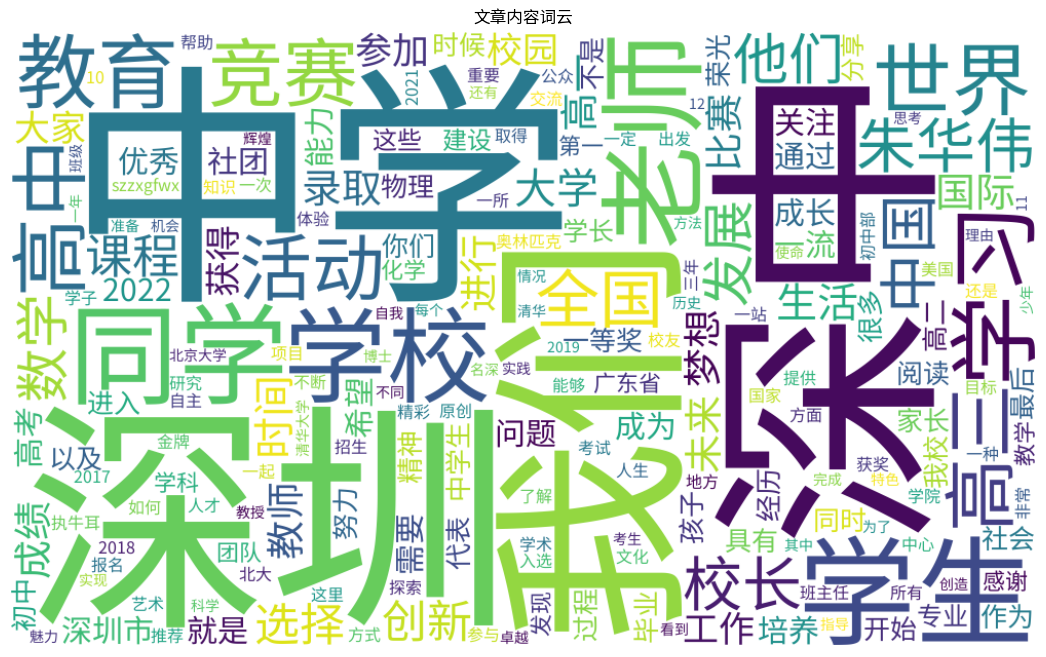


去除停用词后出现最多的20个词：
--------------------------------------------------
中学: 21363次
深圳: 19529次
深中: 19245次
我们: 13064次
学生: 10086次
同学: 8646次
老师: 8418次
学校: 8388次
学习: 6416次
教育: 4942次
世界: 4715次
高中: 4654次
竞赛: 4210次
高三: 4135次
活动: 4092次
全国: 4080次
朱华伟: 3818次
中国: 3786次
校长: 3775次
他们: 3744次


In [11]:

# 生成词云
wc = WordCloud(
    # font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
    width=1000,
    height=600,
    background_color='white'
)
wordcloud = wc.generate_from_frequencies(word_counts)

# 显示词云
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('文章内容词云')
plt.show()

# 显示高频词
print("\n去除停用词后出现最多的20个词：")
print("-" * 50)
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}次")


2014-2016 期间出现最多的10个词（共484篇文章）：
--------------------------------------------------
学生: 2349次
学校: 1557次
同学: 1157次
学习: 1085次
课程: 1038次
教育: 981次
老师: 964次
活动: 833次
他们: 813次
地方: 794次

2017-2019 期间出现最多的10个词（共956篇文章）：
--------------------------------------------------
学生: 3949次
同学: 3444次
老师: 3328次
学校: 2880次
学习: 2172次
教育: 1875次
活动: 1824次
竞赛: 1744次
大学: 1499次
中国: 1456次

2020-2022 期间出现最多的10个词（共585篇文章）：
--------------------------------------------------
同学: 2573次
老师: 2406次
学生: 2293次
学校: 2222次
世界: 2053次
学习: 1853次
选择: 1639次
全国: 1512次
朱华伟: 1480次
高三: 1460次

2023-2025 期间出现最多的10个词（共478篇文章）：
--------------------------------------------------
老师: 1749次
学校: 1734次
朱华伟: 1545次
同学: 1517次
学生: 1505次
校长: 1390次
学习: 1340次
高中: 1327次
世界: 1237次
2022: 1229次


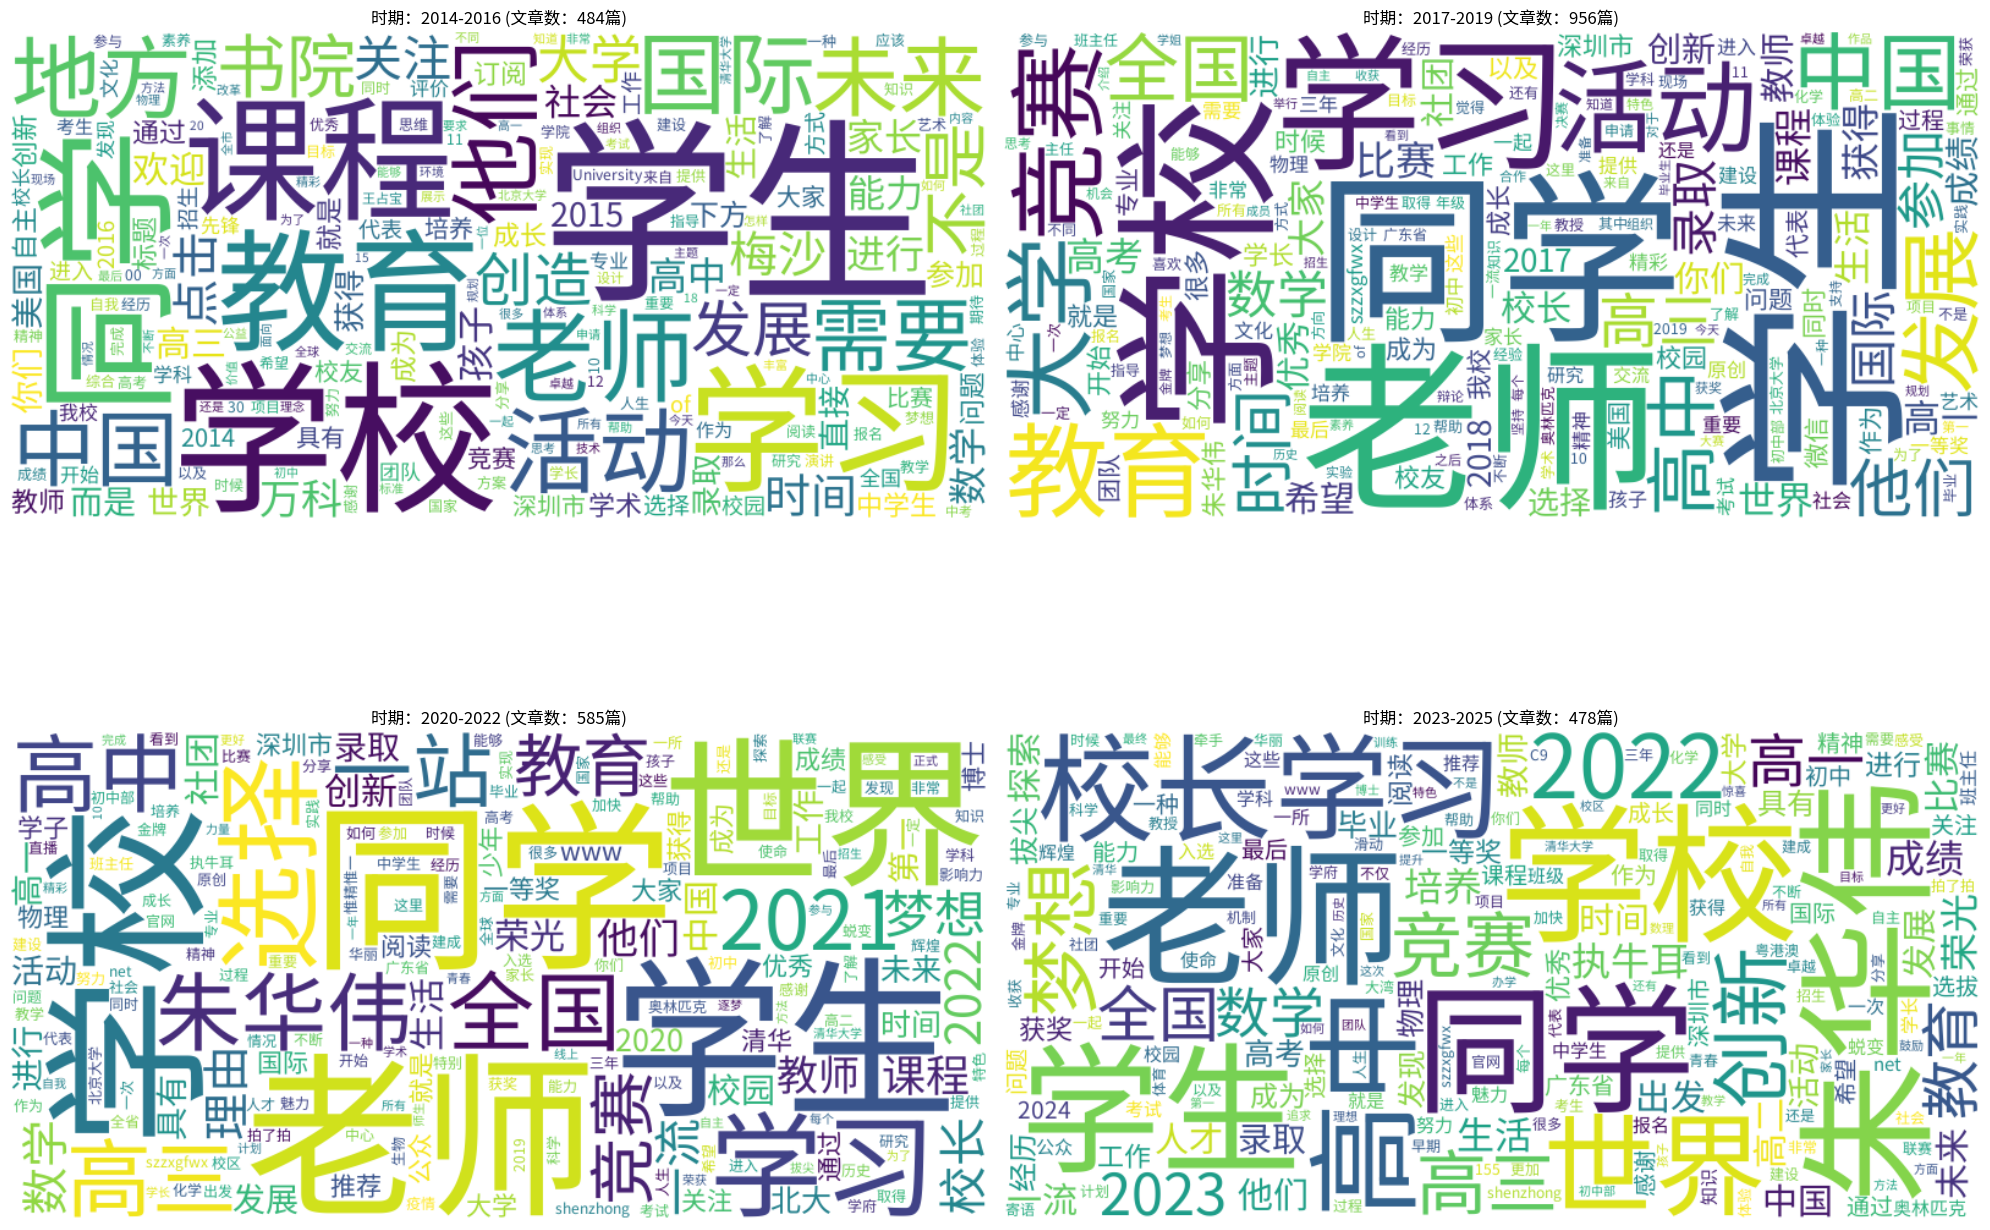


文章时间分布统计：
--------------------------------------------------
最早的文章发布于：2014-03-24 17:41:52
最新的文章发布于：2025-07-12 18:32:17
2014-2016期间的文章数：484篇
2017-2019期间的文章数：956篇
2020-2022期间的文章数：585篇
2023-2025期间的文章数：478篇


In [12]:
# 定义时期
periods = [
    (2014, 2016, '2014-2016'),
    (2017, 2019, '2017-2019'),
    (2020, 2022, '2020-2022'),
    (2023, 2025, '2023-2025')
]

# 定义停用词
stopwords = set(['的', '了', '在', '是', '我', '有', '和', '就',
                '不', '人', '都', '一', '一个', '上', '也', '很',
                '到', '说', '要', '去', '你', '会', '着', '没有',
                '看', '好', '自己', '这', '那', '吗', '么', '什么',
                '啊', '啦', '吧', '把', '还', '让', '又', '这个',
                '这样', '一样', '一直', '这种', '那个', '但是', '现在',
                '可以', '因为', '所以', '只是', '但', '并', '于是',
                '一些', '而', '已经', '中', '它', '他', '她', '从',
                '可能', '如果', '里', '最', '能', '给', '被', '深圳',
                '深中', '中学', '我们', '名深','扫码','左右滑动查看更多'])

# 创建多个子图
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

# 预先统计每个时期的文章数
period_counts = {period[2]: 0 for period in periods}

for i, (start_year, end_year, period) in enumerate(periods):
    # 筛选该时期的文章
    period_text = ""
    # 使用发布时间的年份进行筛选
    period_articles = metadata[
        (metadata['发布时间'].dt.year >= start_year) & 
        (metadata['发布时间'].dt.year <= end_year)
    ]
    
    period_counts[period] = len(period_articles)
    
    # 收集该时期的所有文章
    for idx in period_articles.index:
        text = read_article(period_articles.loc[idx, 'ID'])
        if text:
            period_text += text + "\n"
    
    # 分词并过滤停用词
    words = jieba.cut(period_text)
    word_counts = Counter(w for w in words if len(w) > 1 and w not in stopwords)
    
    # 生成词云
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white'
    )
    
    if word_counts:  # 确保有文本再生成词云
        wordcloud = wc.generate_from_frequencies(word_counts)
        
        # 在对应的子图中显示词云
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f'时期：{period} (文章数：{period_counts[period]}篇)')
        
        # 打印该时期的高频词
        print(f"\n{period} 期间出现最多的10个词（共{period_counts[period]}篇文章）：")
        print("-" * 50)
        for word, count in word_counts.most_common(10):
            print(f"{word}: {count}次")
    else:
        axes[i].text(0.5, 0.5, f'没有{period}期间的文章', 
                    ha='center', va='center')
        
plt.tight_layout()
plt.show()

# 打印时间跨度分布
print("\n文章时间分布统计：")
print("-" * 50)
print(f"最早的文章发布于：{metadata['发布时间'].min()}")
print(f"最新的文章发布于：{metadata['发布时间'].max()}")
for period, count in period_counts.items():
    print(f"{period}期间的文章数：{count}篇")

In [13]:
def prepare_text_data(metadata_df):
    """
    预处理文本数据，生成用于分析的DataFrame
    
    参数:
    metadata_df: DataFrame, 包含文章元信息的DataFrame
    
    返回:
    DataFrame: 包含处理后的文本内容和发布时间
    """
    texts = []
    dates = []
    
    # 收集文本和日期
    for idx in metadata_df.index:
        text = read_article(idx)
        if text:
            texts.append(text)
            dates.append(metadata_df.loc[idx, '发布时间'])
    
    # 创建DataFrame
    text_df = pd.DataFrame({
        '发布时间': dates,
        '内容': texts
    })
    
    # 确保发布时间为datetime类型并排序
    text_df['发布时间'] = pd.to_datetime(text_df['发布时间'])
    text_df = text_df.sort_values('发布时间').reset_index(drop=True)
    
    return text_df

In [14]:
text_df = prepare_text_data(metadata)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_keyword_trend(text_df, keywords, window_days=30, mode="frequency"):
    """
    绘制关键词的词频或次数随时间变化曲线图（动态滑动窗口）

    参数:
    text_df: DataFrame, 包含 '发布时间' 和 '内容' 两列
    keywords: list of str, 要分析的关键词列表
    window_days: int, 滑动窗口大小（单位：天）
    mode: str, 'frequency' 表示计算词频，'count' 表示计算次数（默认 'frequency'）
    """
    assert mode in ['frequency', 'count'], "mode 参数必须为 'frequency' 或 'count'"

    # 确保时间列为 datetime 类型
    text_df['发布时间'] = pd.to_datetime(text_df['发布时间'])

    # 初始化结果 DataFrame
    result_df = pd.DataFrame()
    result_df['date'] = pd.date_range(
        start=text_df['发布时间'].min(),
        end=text_df['发布时间'].max(),
        freq='D'
    )

    # 计算每个滑动窗口内的词频/次数
    for word in keywords:
        values = []
        for date in result_df['date']:
            window_start = max(date - pd.Timedelta(days=window_days / 2), text_df['发布时间'].min())
            window_end = min(date + pd.Timedelta(days=window_days / 2), text_df['发布时间'].max())

            mask = (text_df['发布时间'] >= window_start) & (text_df['发布时间'] <= window_end)
            window_texts = text_df[mask]['内容'].tolist()

            if window_texts:
                word_count = sum(text.count(word) for text in window_texts)
                if mode == 'count':
                    values.append(word_count)
                elif mode == 'frequency':
                    total_chars = sum(len(text) for text in window_texts)
                    freq = word_count / total_chars if total_chars > 0 else 0
                    values.append(freq)
            else:
                values.append(0)

        result_df[word] = values

    # 绘制图像
    plt.figure(figsize=(15, 8))
    for word in keywords:
        plt.plot(result_df['date'], result_df[word], label=word, alpha=0.7)

    # 设置季度刻度和标签
    start_date = result_df['date'].min()
    end_date = result_df['date'].max()
    quarter_dates = pd.date_range(
        start=start_date.to_period('Q').to_timestamp(),
        end=end_date.to_period('Q').to_timestamp(),
        freq='Q'
    )
    quarter_labels = [f"{d.year}Q1" if d.quarter == 1 else f"Q{d.quarter}" for d in quarter_dates]
    plt.xticks(quarter_dates, quarter_labels, rotation=45)

    # 设置图表标题和标签
    mode_label = '词频' if mode == 'frequency' else '次数'
    plt.title(f'关键词{mode_label}变化趋势（滑动窗口：{window_days}天）')
    plt.xlabel('时间')
    plt.ylabel(mode_label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()


C:\Users\18487\AppData\Local\Temp\ipykernel_24412\2891848025.py:58: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_dates = pd.date_range(


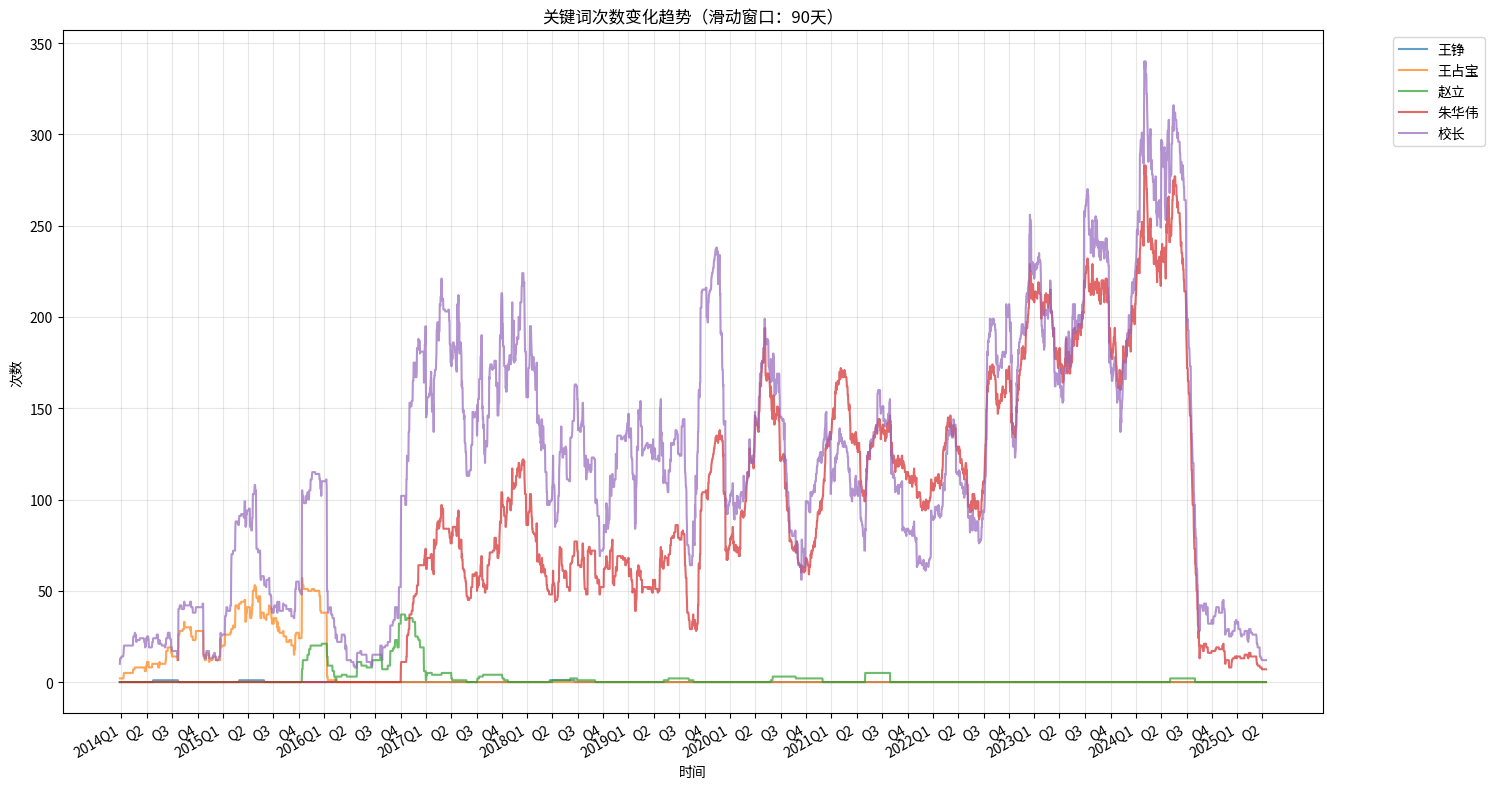

In [16]:
# 使用示例：分析感兴趣的关键词
keywords = ['王铮', '王占宝', '赵立', '朱华伟','校长']
plot_keyword_trend(text_df, keywords, window_days=90,mode='count')

C:\Users\18487\AppData\Local\Temp\ipykernel_24412\2891848025.py:58: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_dates = pd.date_range(


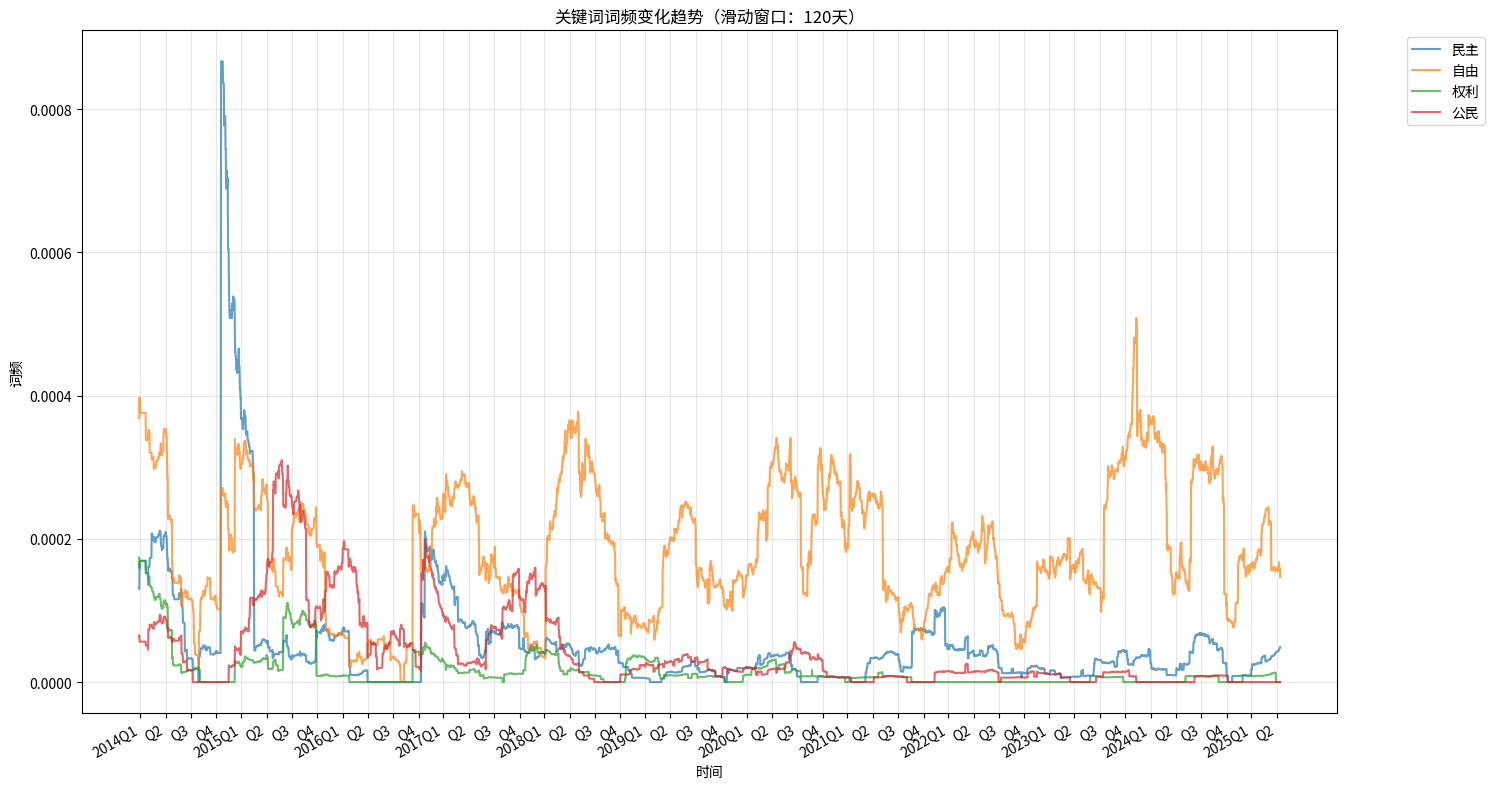

In [17]:
keywords = ['民主','权利','公民']
plot_keyword_trend(text_df, keywords, window_days=120)

C:\Users\18487\AppData\Local\Temp\ipykernel_24412\2891848025.py:58: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_dates = pd.date_range(


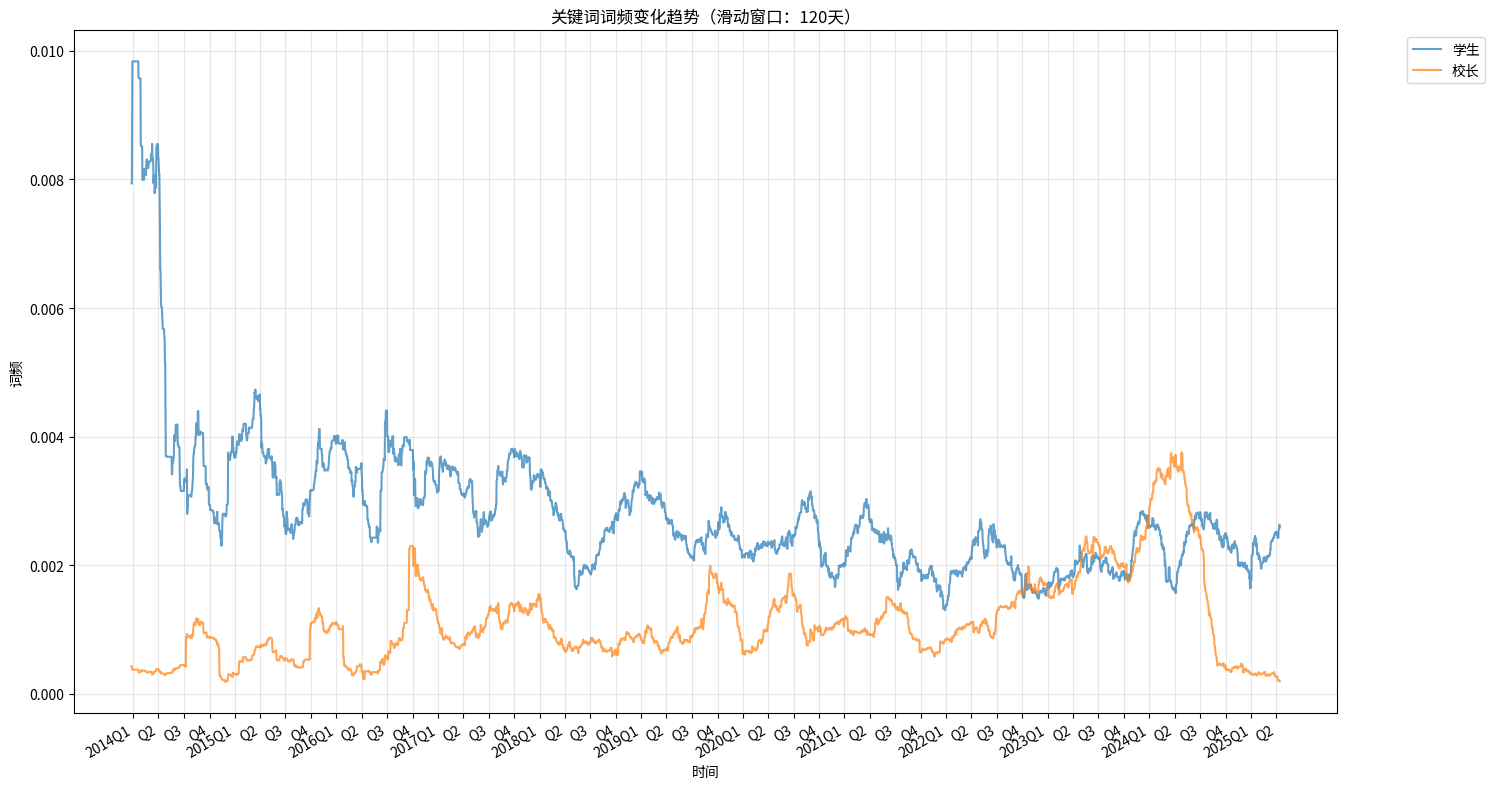

In [18]:
keywords = ['学生','校长']
plot_keyword_trend(text_df, keywords, window_days=120)

# 开始主题模型啦！

In [19]:
text_df = prepare_text_data(metadata)

In [21]:
stopwords = set(['的', '了', '在', '是', '我', '有', '和', '就',
                '不', '人', '都', '一', '一个', '上', '也', '很',
                '到', '说', '要', '去', '你', '会', '着', '没有',
                '看', '好', '自己', '这', '那', '吗', '么', '什么',
                '啊', '啦', '吧', '把', '还', '让', '又', '这个',
                '这样', '一样', '一直', '这种', '那个', '但是', '现在',
                '可以', '因为', '所以', '只是', '但', '并', '于是',
                '一些', '而', '已经', '中', '它', '他', '她', '从',
                '可能', '如果', '里', '最', '能', '给', '被', '深圳',
                '深中', '中学', '我们', '名深','扫码','左右滑动查看更多',
                "很多", "选择", "开始", "觉得",  "喜欢", "这些", "就是",
                 "当时",   "其实", "真的", "一起", "真正",
                 'of','the','The','and','to','in','you','is','was','it'
]
)


In [26]:
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
import tqdm

def evaluate_lda_model(corpus, texts, dictionary, k):
    """
    评估具有k个主题的LDA模型
    
    参数:
    corpus: 文档-词频矩阵
    texts: 预处理后的文档列表
    dictionary: 词典
    k: 主题数量
    
    返回:
    perplexity: 困惑度
    coherence: 连贯性得分
    model: 训练好的模型
    """
    # 训练模型
    model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        random_state=42,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    
    # 计算困惑度
    perplexity = model.log_perplexity(corpus)
    
    # 计算连贯性得分
    coherence_model = CoherenceModel(
        model=model, 
        texts=texts, 
        dictionary=dictionary, 
        coherence='c_v'
    )
    coherence = coherence_model.get_coherence()
    
    return perplexity, coherence, model

# 设置要尝试的主题数范围
min_topics = 6
max_topics = 20
step = 2
topics_range = range(min_topics, max_topics + 1, step)

# 存储评估结果
perplexities = []
coherence_scores = []

# 评估不同主题数的模型
print("\n正在评估不同主题数的模型性能...\n")
print(f"{'主题数':^10}{'困惑度':^15}{'连贯性得分':^15}")
print("-" * 40)

current_best_coherence = float('-inf')
for k in topics_range:
    print(f"\n评估 {k} 个主题的模型...")
    perplexity, coherence, _ = evaluate_lda_model(corpus, documents, dictionary, k)
    perplexities.append(perplexity)
    coherence_scores.append(coherence)
    
    # 打印当前结果
    print(f"{k:^10}{perplexity:^15.4f}{coherence:^15.4f}")
    
    # 检查是否是新的最佳得分
    if coherence > current_best_coherence:
        current_best_coherence = coherence
        print("★ 新的最佳连贯性得分!")
    
    # 打印进度
    progress = list(topics_range).index(k) + 1
    total = len(topics_range)
    print(f"进度: {progress}/{total} ({progress/total*100:.1f}%)")
    print("-" * 40)


正在评估不同主题数的模型性能...

   主题数          困惑度           连贯性得分     
----------------------------------------

评估 6 个主题的模型...
    6         -8.1875        0.5749     
★ 新的最佳连贯性得分!
进度: 1/8 (12.5%)
----------------------------------------

评估 8 个主题的模型...
    8         -8.1761        0.5733     
进度: 2/8 (25.0%)
----------------------------------------

评估 10 个主题的模型...
    10        -8.5043        0.5465     
进度: 3/8 (37.5%)
----------------------------------------

评估 12 个主题的模型...
    12        -9.4645        0.5545     
进度: 4/8 (50.0%)
----------------------------------------

评估 14 个主题的模型...
    14       -10.5534        0.5517     
进度: 5/8 (62.5%)
----------------------------------------

评估 16 个主题的模型...
    16       -11.2899        0.5674     
进度: 6/8 (75.0%)
----------------------------------------

评估 18 个主题的模型...
    18       -11.8542        0.5634     
进度: 7/8 (87.5%)
----------------------------------------

评估 20 个主题的模型...
    20       -12.2710        0.5628     
进度: 8/8 (100.0%)
-------

In [28]:
# 创建可视化图表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 绘制困惑度变化
ax1.plot(list(topics_range), perplexities, marker='o')
ax1.set_xlabel('主题数量')
ax1.set_ylabel('困惑度')
ax1.set_title('主题数量与困惑度的关系')
ax1.grid(True)

# 绘制连贯性得分变化
ax2.plot(list(topics_range), coherence_scores, marker='o')
ax2.set_xlabel('主题数量')
ax2.set_ylabel('连贯性得分')
ax2.set_title('主题数量与连贯性得分的关系')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 找出最佳主题数
# best_coherence_idx = np.argmax(coherence_scores)
# best_topic_num = topics_range[best_coherence_idx]
# print(f"\n基于连贯性得分的最佳主题数量: {best_topic_num}")
# print(f"最佳连贯性得分: {coherence_scores[best_coherence_idx]:.4f}")

# 用最佳主题数训练最终模型
print("\n使用最佳主题数重新训练模型...")
best_topic_num = 10
_, _, best_model = evaluate_lda_model(corpus, documents, dictionary, best_topic_num)

# 打印每个主题的关键词
print("\n最佳模型的主题-关键词分布：")
print("-" * 50)
for idx, topic in best_model.print_topics(-1, num_words=10):
    print(f'主题 {idx+1}:')
    print(topic)
    print()

KeyboardInterrupt: 

In [ ]:
# 创建主题-文档分布矩阵
def create_topic_distribution_matrix(model, corpus, num_topics):
    # 初始化分布矩阵
    doc_topic_dist = np.zeros((len(corpus), num_topics))
    
    # 填充分布矩阵
    for i, doc in enumerate(corpus):
        topic_dist = model.get_document_topics(doc)
        for topic_id, prob in topic_dist:
            doc_topic_dist[i, topic_id] = prob
    
    return doc_topic_dist

# 获取主题分布矩阵
topic_dist_matrix = create_topic_distribution_matrix(best_model, corpus[:50], best_topic_num)  # 只取前50篇文档以便于可视化

# 创建热图
plt.figure(figsize=(12, 8))
sns.heatmap(
    topic_dist_matrix,
    cmap='YlOrRd',
    xticklabels=[f'主题{i+1}' for i in range(best_topic_num)],
    yticklabels=[f'文档{i+1}' for i in range(50)],
    cbar_kws={'label': '主题概率'}
)
plt.title('文档-主题分布热图（前50篇文档）')
plt.xlabel('主题')
plt.ylabel('文档')
plt.tight_layout()
plt.show()

# 计算并展示主题之间的相关性
topic_correlations = np.corrcoef(topic_dist_matrix.T)

plt.figure(figsize=(10, 8))
sns.heatmap(
    topic_correlations,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f',
    xticklabels=[f'主题{i+1}' for i in range(best_topic_num)],
    yticklabels=[f'主题{i+1}' for i in range(best_topic_num)]
)
plt.title('主题相关性热图')
plt.tight_layout()
plt.show()

In [23]:
import jieba
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# 文本预处理函数
def preprocess_text(text):
    # 分词
    words = jieba.cut(text)
    # 过滤停用词和单字词
    return [word for word in words if len(word) > 1 and word not in stopwords]

# 处理所有文章
documents = []
for idx in metadata.index:
    text = read_article(idx)
    if text:
        processed_doc = preprocess_text(text)
        if processed_doc:  # 确保文档不为空
            documents.append(processed_doc)

# 创建词典
dictionary = corpora.Dictionary(documents)

# 过滤极端频率的词
dictionary.filter_extremes(no_below=5, no_above=0.75)

# 创建文档-词频矩阵
corpus = [dictionary.doc2bow(doc) for doc in documents]

# 设置主题数
num_topics = 10

# 训练LDA模型
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

主题关键词分布：
--------------------------------------------------
主题 0:
0.046*"学生" + 0.021*"课程" + 0.016*"学习" + 0.015*"数学" + 0.015*"老师" + 0.013*"教育" + 0.010*"教学" + 0.009*"能力" + 0.008*"学科" + 0.008*"通过" + 0.008*"数理" + 0.007*"培养" + 0.007*"研究" + 0.007*"教师" + 0.006*"博士"

主题 1:
0.035*"2023" + 0.023*"招生" + 0.022*"学校" + 0.021*"报名" + 0.020*"2024" + 0.019*"考生" + 0.015*"自主" + 0.014*"录取" + 0.011*"招聘" + 0.011*"考核" + 0.009*"中考" + 0.008*"专项" + 0.008*"工作" + 0.008*"时间" + 0.008*"成绩"

主题 2:
0.034*"全国" + 0.025*"竞赛" + 0.020*"一等奖" + 0.016*"获奖" + 0.016*"数学" + 0.016*"广东省" + 0.015*"入选" + 0.014*"奥林匹克" + 0.014*"比赛" + 0.013*"物理" + 0.013*"学校" + 0.012*"中学生" + 0.012*"金牌" + 0.011*"化学" + 0.010*"中国"

主题 3:
0.026*"荣光" + 0.013*"中国" + 0.012*"同学" + 0.011*"创新" + 0.010*"教授" + 0.010*"牵手" + 0.010*"世界" + 0.009*"院士" + 0.009*"科学" + 0.008*"科技" + 0.007*"梦想" + 0.007*"项目" + 0.006*"研究" + 0.006*"国家" + 0.006*"讲座"

主题 4:
0.021*"活动" + 0.015*"家长" + 0.011*"00" + 0.011*"图书馆" + 0.010*"疫情" + 0.010*"关注" + 0.010*"线上" + 0.009*"国际部" + 0.009*"时间" + 0.009*

c:\Users\18487\miniconda3\envs\lda_env\lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


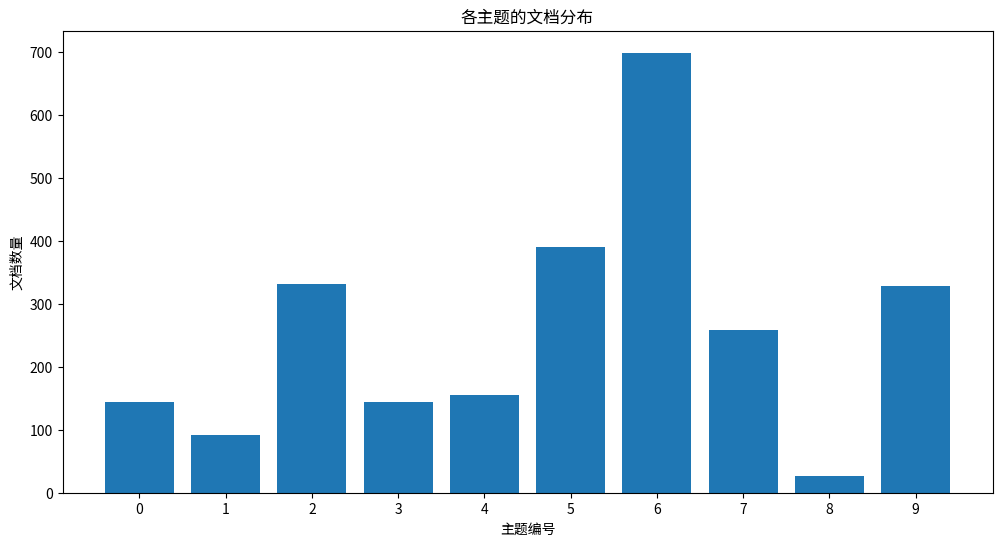


各主题的文档分布统计：
--------------------------------------------------
主题 0: 144 篇文档 (6.06%)
主题 1: 91 篇文档 (3.83%)
主题 2: 332 篇文档 (13.97%)
主题 3: 144 篇文档 (6.06%)
主题 4: 156 篇文档 (6.56%)
主题 5: 391 篇文档 (16.45%)
主题 6: 699 篇文档 (29.41%)
主题 7: 259 篇文档 (10.90%)
主题 8: 26 篇文档 (1.09%)
主题 9: 329 篇文档 (13.84%)


In [31]:
# 打印每个主题的前15个关键词
print("主题关键词分布：")
print("-" * 50)
for idx, topic in lda_model.print_topics(-1, num_words=15):
    print(f'主题 {idx}:')
    print(topic)
    print()

# 准备交互式可视化
vis_data = pyLDAvis.gensim_models.prepare(
    lda_model, corpus, dictionary,
    mds='mmds',
    R=30
)
# 保存可视化结果到HTML文件
pyLDAvis.save_html(vis_data, 'lda_visualization.html')

# 分析文档-主题分布
def get_document_topics(lda_model, corpus, threshold=0.3):
    """获取文档主题分布中主题概率大于阈值的主题"""
    doc_topics = []
    for doc in corpus:
        topics = lda_model.get_document_topics(doc)
        major_topics = [topic for topic, prob in topics if prob >= threshold]
        doc_topics.append(major_topics)
    return doc_topics

doc_topics = get_document_topics(lda_model, corpus)

# 统计每个主题的文档数量
topic_counts = {i: 0 for i in range(num_topics)}
for doc_topic_list in doc_topics:
    for topic in doc_topic_list:
        topic_counts[topic] += 1

# 可视化主题分布
plt.figure(figsize=(12, 6))
topics = list(topic_counts.keys())
counts = list(topic_counts.values())

plt.bar(topics, counts)
plt.title('各主题的文档分布')
plt.xlabel('主题编号')
plt.ylabel('文档数量')
plt.xticks(topics)
plt.show()

# 输出每个主题的文档数量和占比
print("\n各主题的文档分布统计：")
print("-" * 50)
total_docs = len(corpus)
for topic, count in topic_counts.items():
    percentage = (count / total_docs) * 100
    print(f"主题 {topic}: {count} 篇文档 ({percentage:.2f}%)")

In [32]:
# 主题编号到主题标签的映射
topic_labels = {
    0: "学科教育",
    1: "招考政策",
    2: "竞赛牛逼",
    3: "科学讲座",
    4: "线上互动",
    5: "校长恩情",
    6: "成长故事",
    7: "高三地狱",
    8: "国际精英",
    9: "校园生活"
}


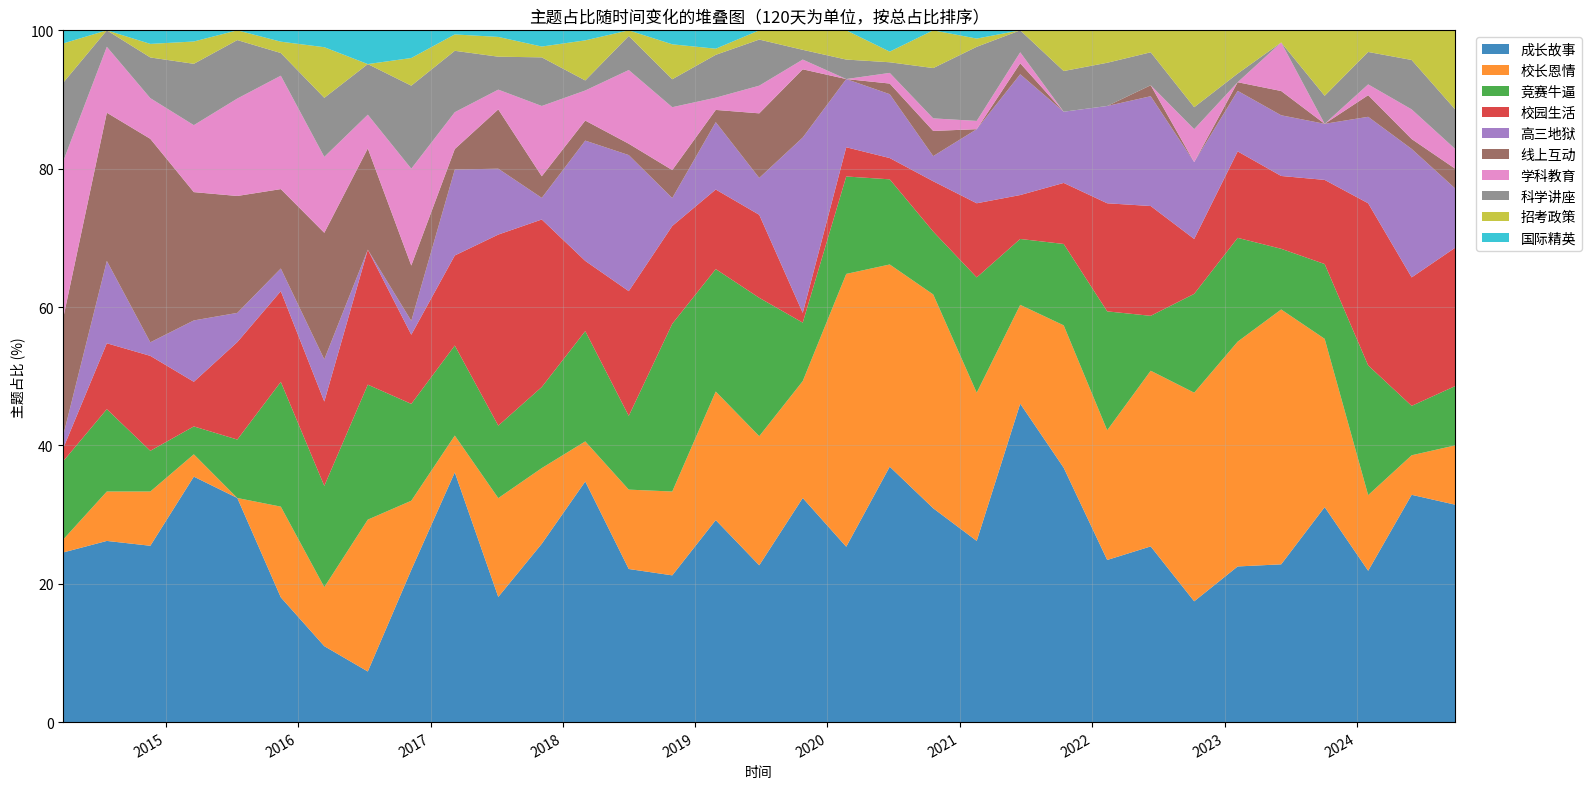

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_topics_over_time_stacked(metadata_df, doc_topics, num_topics, window_days=180):
    """绘制堆叠面积图展示主题随时间变化的占比"""
    # 1. 结构化原始数据
    topic_time_data = []
    for idx, doc_topic_list in enumerate(doc_topics):
        if doc_topic_list:
            date = metadata_df.iloc[idx]['发布时间']
            for topic in doc_topic_list:
                topic_time_data.append({
                    'date': date,
                    'topic': topic
                })
    
    topic_time_df = pd.DataFrame(topic_time_data)
    topic_time_df['date'] = pd.to_datetime(topic_time_df['date'])

    # 2. 构造时间窗口
    time_windows = pd.date_range(
        start=topic_time_df['date'].min(),
        end=topic_time_df['date'].max(),
        freq=f'{window_days}D'
    )
    
    # 3. 聚合每个时间窗口的主题分布
    topic_trends = []
    for start_time in time_windows:
        end_time = start_time + pd.Timedelta(days=window_days)
        window_data = topic_time_df[
            (topic_time_df['date'] >= start_time) & 
            (topic_time_df['date'] < end_time)
        ]
        total_docs = len(window_data)
        topic_counts = window_data['topic'].value_counts()
        
        row = {'window_start': start_time}
        for topic in range(num_topics):
            count = topic_counts.get(topic, 0)
            row[f'topic_{topic}'] = count / total_docs * 100 if total_docs > 0 else 0
        topic_trends.append(row)

    trends_df = pd.DataFrame(topic_trends)
    trends_df.set_index('window_start', inplace=True)

    # 4. 按总占比排序
    total_proportions = trends_df.sum(axis=0)
    sorted_topics = total_proportions.sort_values(ascending=False).index.tolist()  # e.g. ['topic_2', 'topic_0', ...]

    # 获取排序后的数据与标签
    sorted_data = [trends_df[col] for col in sorted_topics]
    sorted_labels = [topic_labels[int(col.split('_')[1])] for col in sorted_topics]
    
    # 5. 绘制堆叠图（去除空白边）
    fig, ax = plt.subplots(figsize=(16, 8))

    ax.stackplot(
        trends_df.index,
        sorted_data,
        labels=sorted_labels,
        alpha=0.85
    )

    ax.set_title(f'主题占比随时间变化的堆叠图（{window_days}天为单位，按总占比排序）')
    ax.set_xlabel('时间')
    ax.set_ylabel('主题占比 (%)')
    ax.set_ylim(0, 100)  # 固定纵坐标范围
    ax.set_xlim(trends_df.index.min(), trends_df.index.max())  # 精确限制横坐标
    ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
    ax.grid(alpha=0.3)
    ax.margins(x=0, y=0)  # 不留边缘空白
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()
analyze_topics_over_time_stacked(metadata_df=metadata, doc_topics=doc_topics, num_topics=10, window_days=120)


In [39]:
lda_model.save("lda_model.model")

# 训练词向量模型！